In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sps

In [22]:
df_Induction = pd.read_csv('../CSV_files/IFN induction genes.csv')
df_Rand = pd.read_csv('../CSV_files/Random_Genes.csv')
df_ISGs = pd.read_csv('../CSV_files/ISGs.csv')

In [23]:
df_Induction.columns, df_Rand.columns, df_ISGs.columns = ['ID','Nseqs','M0','TreeL','P-val','2dLNL','M8'], ['ID','Nseqs','M0','TreeL','P-val','2dLNL','M8'],['ID','Nseqs','M0','TreeL','P-val','2dLNL',"M8"]
print df_Induction.head()
print '\n'
print df_Rand.head()
print df_ISGs.head()

      ID  Nseqs       M0    TreeL     P-val      2dLNL   M8
0  DDX41     17  0.05331  0.50841    p>0.05   0.022944  NaN
1  DDX58     18  0.34176  0.44445  2.93E-07  26.295116  yes
2   FADD     16  0.15877  0.69091    p>0.05   0.021830  NaN
3  IFI16     16  0.99062  0.48286  5.81E-12  47.394374  yes
4  IFIH1     18  0.31292  0.43732     >0.05   0.679464  NaN


        ID  Nseqs       M0    TreeL     P-val     2dLNL   M8
0    PYGO1     16  0.11171  0.26746  0.871442  0.026188  NaN
1  MSANTD3     13  0.04902  0.13291  0.863859  0.029400  NaN
2  PIP5K1A     16  0.05602  0.24939  0.701676  0.146734  NaN
3  FAM102A     20  0.06066  0.51489  0.691170  0.157822  NaN
4    GNAT3     19  0.04735  0.29761  0.690562  0.158478  NaN
       ID  Nseqs       M0    TreeL      P-val      2dLNL   M8
0    BST2     20  0.73156   1.6286  0.0084449   6.936600  yes
1   TRIM5     17  1.16142  1.29457   4.29E-18  75.185502  yes
2  TRIM56     19  0.07746  0.79052  0.4534933   0.561906  NaN
3  TRIM38     20  0.3268

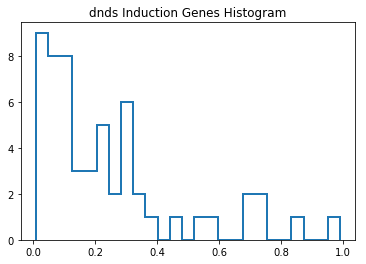

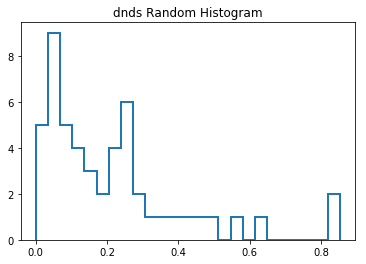

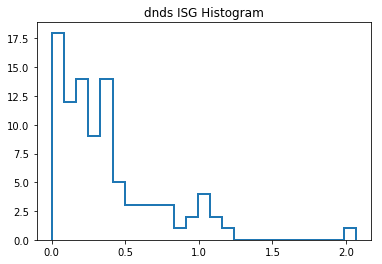

In [24]:
dnds_Induction = df_Induction['M0']
dnds_Rand = df_Rand['M0']
dnds_ISGs = df_ISGs['M0']

plt.hist(dnds_Induction,bins=25,histtype='step',lw=2)
plt.title('dnds Induction Genes Histogram')
plt.show()

plt.hist(dnds_Rand,bins=25,histtype='step',lw=2)
plt.title('dnds Random Histogram')
plt.show()

plt.hist(dnds_ISGs,bins=25,histtype='step',lw=2)
plt.title('dnds ISG Histogram')
plt.show()


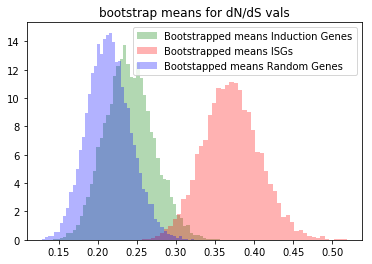

In [31]:
def bootstrap_samples_mean(array,nsamples=100):
    bootstrap_array = []
    for _ in range(nsamples):
        bootstrap_array.append(np.mean(np.random.choice(array,len(array),replace=True)))
    return bootstrap_array


bootstrap_mean_Induction = bootstrap_samples_mean(dnds_Induction,10000)
bootstrap_mean_ISGs = bootstrap_samples_mean(dnds_ISGs,10000)
bootstrap_mean_Rand = bootstrap_samples_mean(dnds_Rand, 10000)
plt.hist(bootstrap_mean_Induction,bins=50,color='green', alpha=0.3,label='Bootstrapped means Induction Genes',normed=True)
plt.hist(bootstrap_mean_ISGs,bins=50,color='red',alpha=0.3,label='Bootstrapped means ISGs',normed=True)
plt.hist(bootstrap_mean_Rand, bins=50, color='blue',alpha=0.3,label='Bootstapped means Random Genes', normed=True)


plt.title('bootstrap means for dN/dS vals')
#plt.axvline(np.mean(dnds_vals),color='k',lw)
plt.legend()
plt.savefig('../Figures/bootstrap_mean_histograms4.pdf')
plt.show()

In [27]:

sps.ks_2samp(dnds_Induction,dnds_Rand)

Ks_2sampResult(statistic=0.10357142857142865, pvalue=0.92584006153298071)

In [36]:
sps.ks_2samp(bootstrap_mean_Rand,bootstrap_mean_Induction)

Ks_2sampResult(statistic=0.34370000000000001, pvalue=0.0)

In [38]:
sps.ks_2samp(bootstrap_mean_Rand,bootstrap_mean_ISGs)


Ks_2sampResult(statistic=0.98640000000000005, pvalue=0.0)

In [33]:
sps.ks_2samp(dnds_ISGs,dnds_Rand)

Ks_2sampResult(statistic=0.28421052631578947, pvalue=0.0077533121155986158)